**Name:** <span style="color:red">Eloi Vilella</span>

# SYSTEMS AND NETWORK BIOLOGY - PRACTICAL 5
# Solving the master equation


---

To submit your report, answer the questions below and save the *notebook* clicking on `File > Download as > iPython Notebook` in the menu at the top of the page. **Rename the notebook file** to ''`practicalN_name1_name2.ipynb`'', where `N` is the number of the practical, and `name1` and `name2` are the first surnames of the two team members (only one name if the report is sent individually). Finally, **submit the resulting file through the *Aula Global***.

Remember to label the axes in all the plots.

*IMPORTANT REMINDER: Before the final submission, remember to **reset the kernel** and re-run the whole notebook again to check that it works.*

---

The aim of this practical is to solve the master equation of a birth-death processes in different situations. We will begin with the case of ***constitutive expression***. To that end, we will first write a computer code that calculates, following the steps described in class, the stationary probability density $P(n)$ of a birth-death process with constitutive expression ($C(n)=\alpha$, $D(n)=\delta n$), which we will use as a control in what follows, and plot the resulting distribution $P(n)$. Use the following parameter values: $\alpha=10$, $\delta=1.$

The solution of the master equation for this constitutive expression case can be obtained analytically, and shown to correspond to the Poisson distribution:
$$
p(n)=\frac{\lambda^n}{n!}\exp(-\lambda),
$$
where $\lambda=\alpha/\delta$ is the deterministic solution. Compare the numerical solution that you have obtained with the analytical expression of the Poisson distribution, and with the deterministic equilibrium of the system

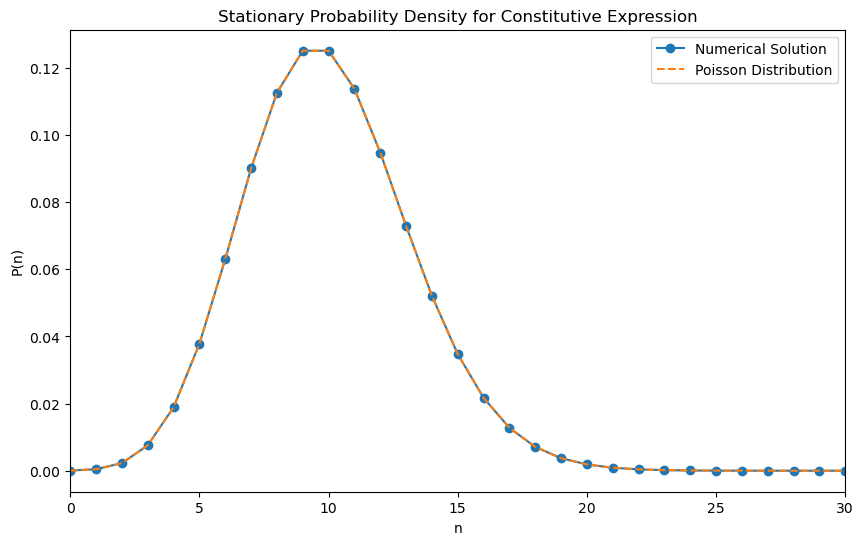

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from math import factorial
from scipy.stats import poisson

#parameters
alpha = 10
delta = 1
lambda_val = alpha / delta  #deterministic solution for the Poisson distribution

#define the range of n values
n_max = 120
n_values = np.arange(0, n_max + 1)

#calculate the analytical Poisson distribution
poisson_dist = poisson.pmf(n_values, lambda_val)

#numerical calculation of P(n) using recursive approach
P_n = np.zeros(n_max + 1)
P_n[0] = np.exp(-lambda_val)  #start with P(0) from the analytical solution

#recursively compute P(n) based on birth-death equation
for n in range(1, n_max + 1):
    P_n[n] = (alpha / (delta * n)) * P_n[n - 1]

#plot results
plt.figure(figsize=(10, 6))
plt.plot(n_values, P_n, 'o-', label='Numerical Solution')
plt.plot(n_values, poisson_dist, '--', label='Poisson Distribution')
plt.xlabel('n')
plt.xlim(0,30)
plt.ylabel('P(n)')
plt.title('Stationary Probability Density for Constitutive Expression')
plt.legend()
plt.show()


---
In this plot we can see the stationary probability density $(P(n))$ for the constitutive expression case, where $C(n) = \alpha$ (constant birth rate) and $D(n) = \delta n$ (death rate proportional to $n$).

I put a the analytical poisson distribution to see clearly that it corresponds to the numerical solution The distribution is centered around $n \approx 10$, which aligns with the deterministic prediction $\lambda = \alpha / \delta = 10$ for $\alpha = 10$ and $\delta = 1$.

The constitutive expression model generates a Poisson distribution because the birth rate is independent of $n$. Consequently, it results in a balanced, steady-state distribution with moderate variance. Without any feedback, the birth-death process leads to fluctuations around the mean but maintains a single peak due to the constant birth rate.


---

Next, write another computer code that calculates the stationary probability density $P(n)$ of a birth-death process with negative feedback (defined by $C(n)=\frac{\alpha_n}{1+n/k}$), with $\alpha_n=55$ and $k=2$.

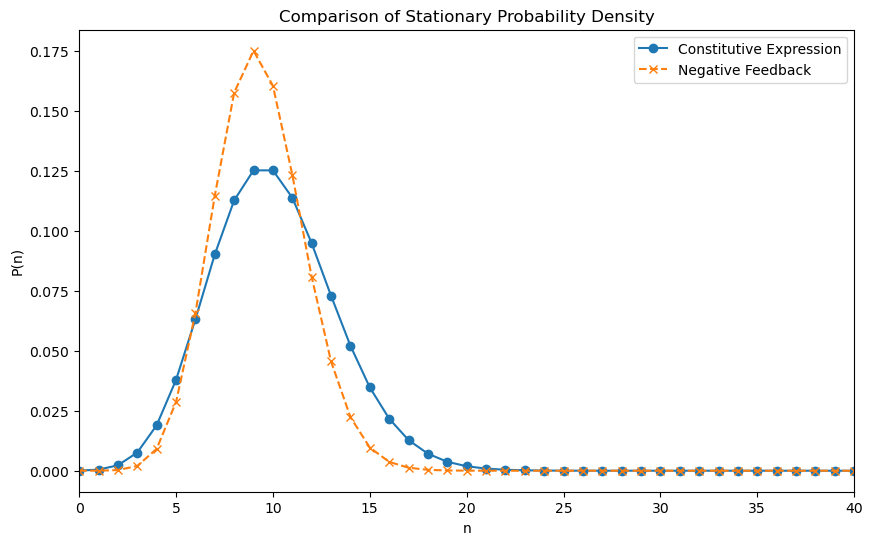

In [18]:
#parameters for negative feedback case
alpha_n = 55
k = 2

#numerical calculation of P(n) with negative feedback
P_n_feedback = np.zeros(n_max + 1)
P_n_feedback[0] = 1  #arbitrarily normalize P(0) to 1 for iteration

#recursively compute P(n) for the negative feedback
for n in range(1, n_max + 1):
    C_n = alpha_n / (1 + n / k)  #negative feedback birth rate
    D_n = delta * n  #death rate
    P_n_feedback[n] = (C_n / D_n) * P_n_feedback[n - 1]

#normalize to ensure probabilities sum to 1
P_n_feedback /= np.sum(P_n_feedback)

#plot results
plt.figure(figsize=(10, 6))
plt.plot(n_values, P_n, 'o-', label='Constitutive Expression')
plt.plot(n_values, P_n_feedback, 'x--', label='Negative Feedback')
plt.xlabel('n')
plt.xlim(0,40)
plt.ylabel('P(n)')
plt.title('Comparison of Stationary Probability Density')
plt.legend()
plt.show()


---

This second plot compares the stationary probability densities $P(n)$ for constitutive expression (blue line) and negative feedback (orange dashed line with crosses).

$$ C(n) = \frac{\alpha n}{1 + \frac{n}{k}} $$

In the negative feedback scenario, the birth rate decreases as $n$ increases. Specifically, $\alpha n = 55$ and $k = 2$.

The negative feedback distribution exhibits a sharper peak compared to the constitutive expression distribution. It has a higher concentration around the mean and i also has a steeper decline as $n$ moves away from the peak.

Negative feedback tipically works to stabilize the population size. As $n$ increases, the birth rate goes down, limiting tge growth of the system. This feedback reduces the variability of $n$, resulting in a tighter and more sharply peaked distribution around the mean.



---


Finally, calculate the stationary probability density $P(n)$ of a birth-death process with cooperative positive feedback with leakiness (defined by $C(n)=\alpha_0+\frac{\alpha_p n^p}{k^p+n^p}$), with $\alpha_0 = 10$, $\alpha_p=75$, $p=4$, and $k=40$.

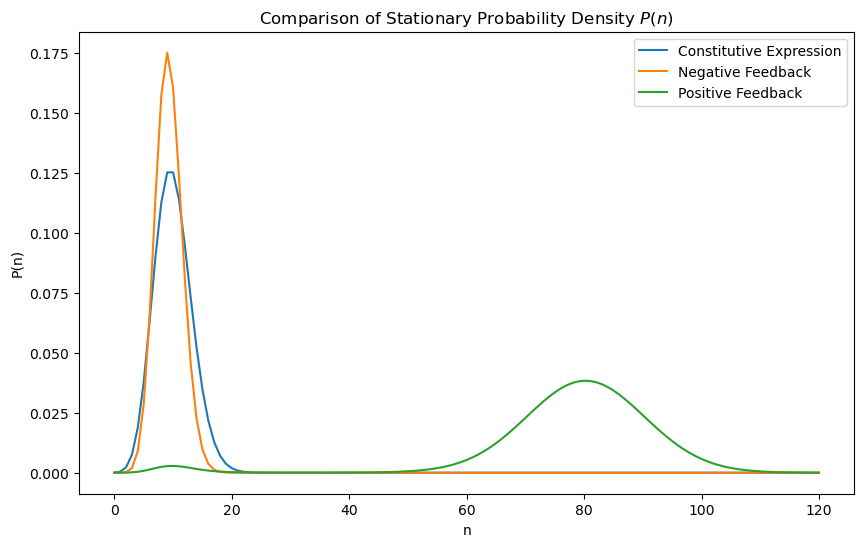

In [19]:
# Parameters for positive feedback case
alpha_0 = 10
alpha_p = 75
p = 4
k = 40

# Numerical calculation of P(n) with positive feedback
P_n_positive_feedback = np.zeros(n_max + 1)
P_n_positive_feedback[0] = 1  # Arbitrarily normalize P(0) to 1 for iteration

# Recursively compute P(n) for the positive feedback
for n in range(1, n_max + 1):
    C_n = alpha_0 + (alpha_p * n**p) / (k**p + n**p)  # Positive feedback birth rate
    D_n = delta * n  # Death rate
    P_n_positive_feedback[n] = (C_n / D_n) * P_n_positive_feedback[n - 1]

# Normalize to ensure probabilities sum to 1
P_n_positive_feedback /= np.sum(P_n_positive_feedback)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(n_values, P_n, '-', label='Constitutive Expression')
plt.plot(n_values, P_n_feedback, '-', label='Negative Feedback')
plt.plot(n_values, P_n_positive_feedback, '-', label='Positive Feedback')
plt.xlabel('n')
plt.ylabel('P(n)')
plt.title('Comparison of Stationary Probability Density $P(n)$')
plt.legend()
plt.show()


In positive feedback, as $n$ increases, the birth rate significantly accelerates after a certain threshold. This results in a bimodal distribution, characterized by two distinct peaks: one at a low $n$ value and another at a high $n$ value. this enables a switch-like behavior in the system. The presence of two stable states allows the system to toggle between "off" (low $n$) and "on" (high $n$) states. This characteristic of positive feedback creates a broader, less concentrated distribution, reflecting the increased variability and potential for higher molecule count at equilibrium.